In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
cd drive/MyDrive/Efficient-CapsNet-main

[Errno 2] No such file or directory: 'drive/MyDrive/Efficient-CapsNet-main'
/content/drive/MyDrive/Efficient-CapsNet-main


In [14]:
pwd

'/content/drive/My Drive/Efficient-CapsNet-main'

In [4]:
pip install -r requirements.txt

     |████████████████████████████████| 686kB 7.6MB/s 


# Efficient-CapsNet Model Test

In this notebook we provide a simple interface to test the different trained Efficient-CapsNet models on the three datasets:

- MNIST (MNIST)
- smallNORB (SMALLNORB)
- Multi-MNIST (MULTIMNIST)

**NB**: remember to modify the "config.json" file with the appropriate parameters.

%load_ext autoreload
%autoreload 2

In [15]:
import tensorflow as tf
from utils import Dataset, plotImages, plotWrongImages
from models import EfficientCapsNet

In [16]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [17]:
# some parameters
model_name = 'TERM_PROJECT' 
#custom_path = None # if you've trained a new model, insert here the full graph weights path
custom_path = '/content/drive/MyDrive/Efficient-CapsNet-main/bin/efficient_capsnetTERM_PROJECT_new_train.h5'

# 1.0 Import the Dataset

In [18]:
dataset = Dataset(model_name, config_path='config.json')

(2450, 28, 28, 1) (2450, 10) (1700, 28, 28, 1) (1700, 10) <class 'tuple'>
[INFO] Dataset loaded!


## 1.1 Visualize imported dataset

(20, 28, 28) (20, 10) 20 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


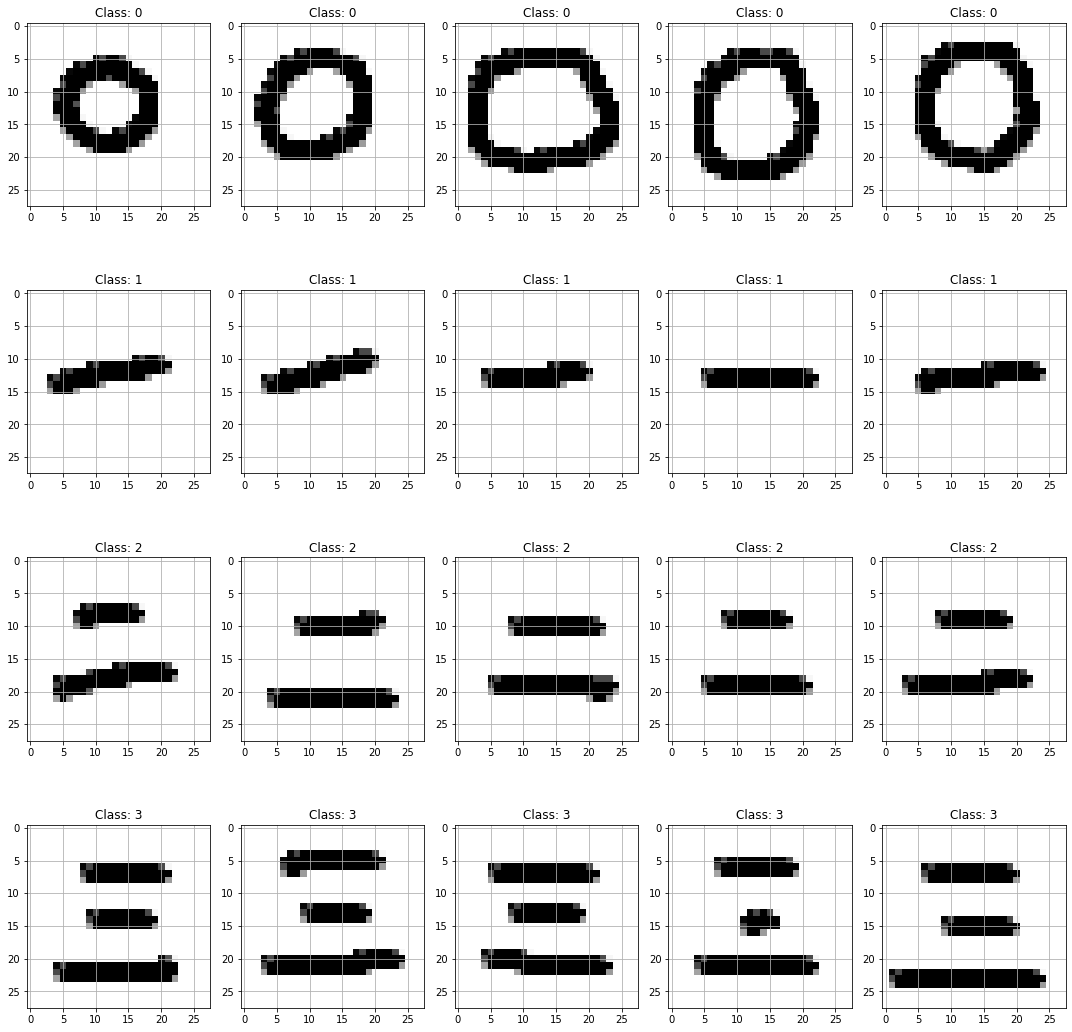

In [19]:
n_images = 20 # number of images to be plotted
plotImages(dataset.X_test[:n_images,...,0], dataset.y_test[:n_images], n_images, dataset.class_names)

# 2.0 Load the Model

In [20]:
model_test = EfficientCapsNet(model_name, mode='test', verbose=True, custom_path=custom_path)

model_test.load_graph_weights() # load graph weights (bin folder)

Model: "Efficient_CapsNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 20, 64)        36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 20, 20, 64)  

# 3.0 Test the Model

In [63]:
print(dataset.X_test.shape, type(dataset.X_test))
print(dataset.y_test.shape, type(dataset.y_test))

model_test.evaluate(dataset.X_test, dataset.y_test) # if "smallnorb" use X_test_patch

(1700, 28, 28, 1) <class 'numpy.ndarray'>
(1700, 10) <class 'numpy.ndarray'>
------------------------------TERM_PROJECT Evaluation------------------------------
Test acc: 0.9911764705882353
Test error [%]: 0.8824%
N° misclassified images: 14 out of 1700


In [81]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/drive/MyDrive/Efficient-CapsNet-main/term_project/test_g.jpg', cv2.IMREAD_GRAYSCALE)
print(image.shape, type(image))
cv2_imshow(image)
image[image>=180] = 255. #clarify
image[image<180] = 0.
cv2.imwrite('./term_project/test_g_clarify.jpg', image)
image = image/255. # nomalize


image = image.reshape(1, 28, 28, 1)
predict_list = model_test.predict(image)
print('-->', np.argmax(predict_list[0], -1))
cla, img = predict_list[0], predict_list[1]
print('-->predict class probability:', cla)
cv2_imshow(img.reshape(28, 28)*255.)
cv2.imwrite('./term_project/test_output.jpg', img.reshape(28, 28)*255.)

(28, 28) <class 'numpy.ndarray'>


--> [5]
-->predict class probability: [[0.09519254 0.02380581 0.07775634 0.25454366 0.07716178 0.7066297
  0.15594319 0.035183   0.03473194 0.05735227]]


True

In [77]:
image = cv2.imread('/content/drive/MyDrive/Efficient-CapsNet-main/term_project/5-3.bmp', cv2.IMREAD_GRAYSCALE)
print(image.shape, type(image))
cv2_imshow(image)
image = image/255.

image = image.reshape(1, 28, 28, 1)
predict_list = model_test.predict(image)
print('-->', np.argmax(predict_list[0], -1))
cla, img = predict_list[0], predict_list[1]
print('-->predict class probability:', cla)
cv2_imshow(img.reshape(28, 28)*255.)

(28, 28) <class 'numpy.ndarray'>


--> [5]
-->predict class probability: [[0.02582857 0.04042725 0.12062072 0.13800347 0.03605415 0.9604764
  0.05916787 0.02330744 0.03883538 0.04360802]]


## 3.1 Plot misclassified images

(1700, 28, 28, 1) <class 'numpy.ndarray'>


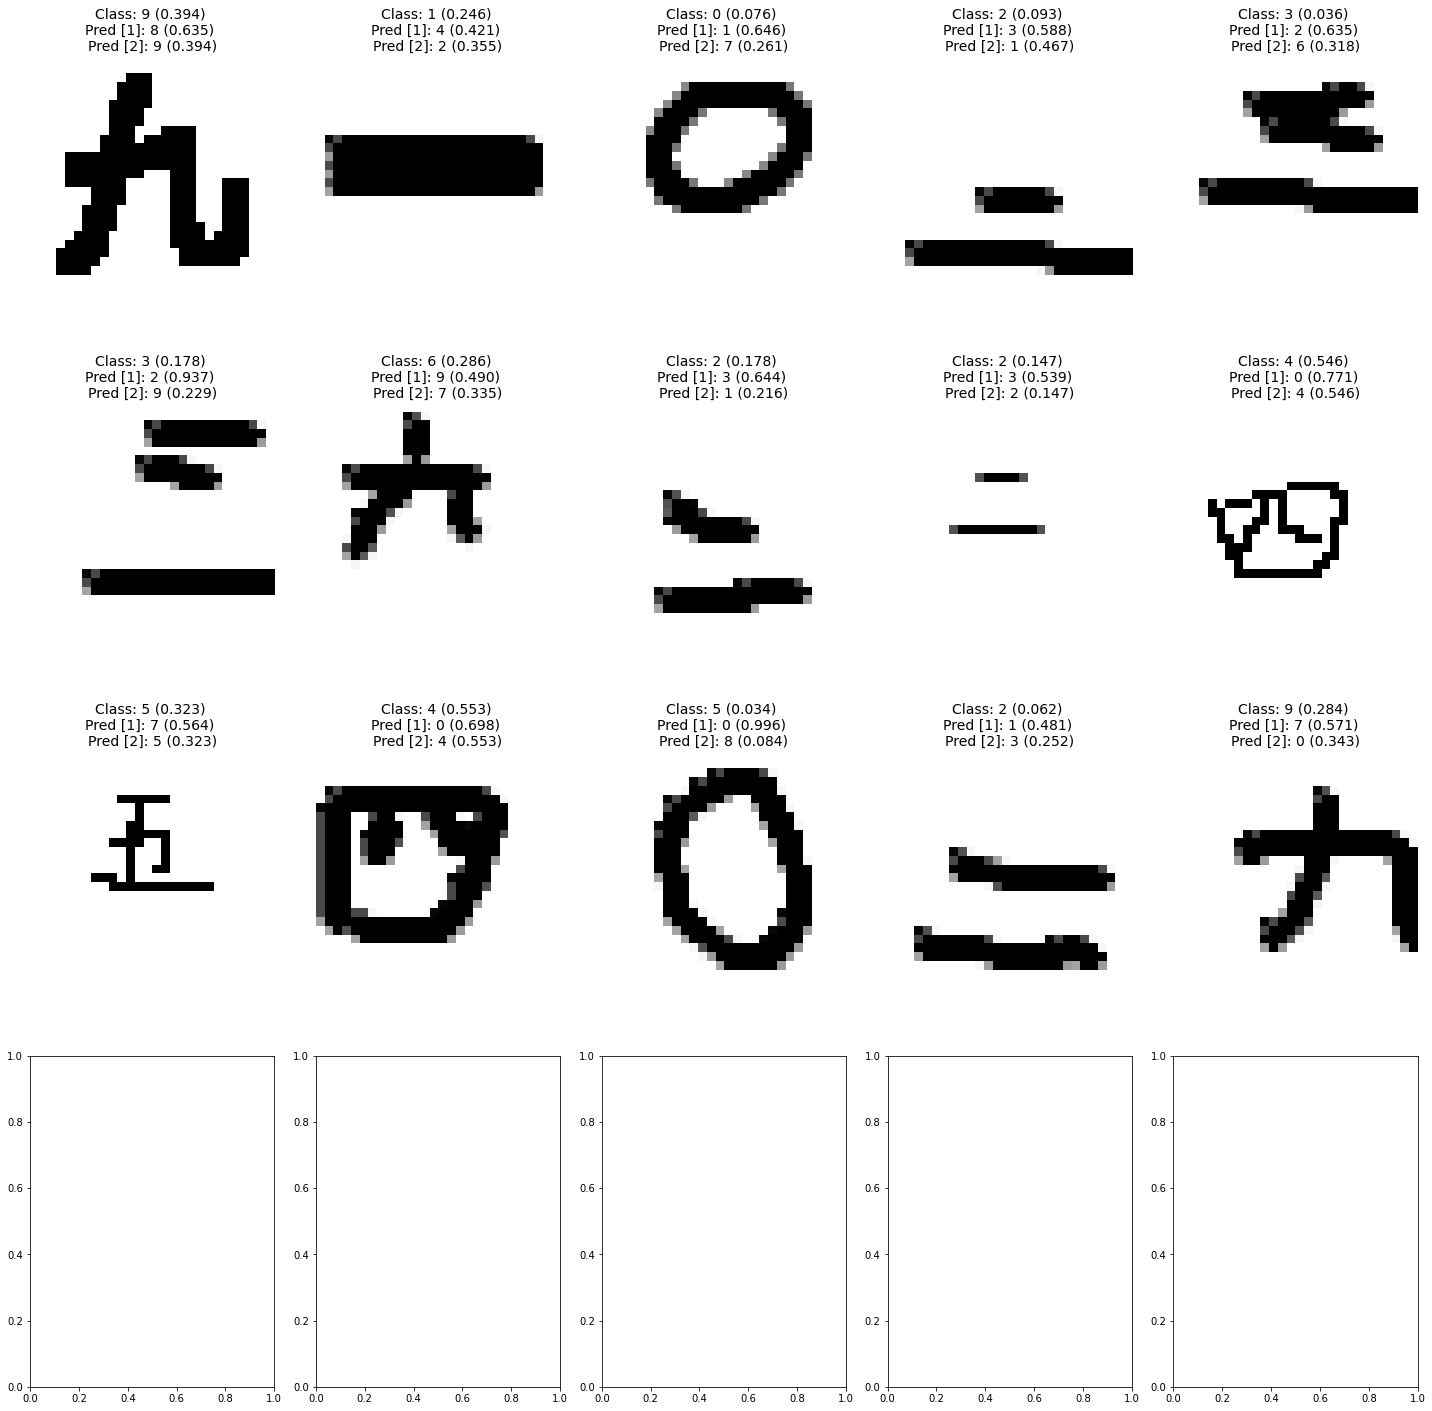

In [36]:
#not working with MultiMNIST
print(dataset.X_test.shape, type(dataset.X_test))
y_pred = model_test.predict(dataset.X_test)[0] # if "smallnorb" use X_test_patch

n_images = 20
plotWrongImages(dataset.X_test, dataset.y_test, y_pred, # if "smallnorb" use X_test_patch
                n_images, dataset.class_names)